# MNIST Simple Demo

## MNIST:

<img src="./images/mnist.jpg",width=600,height=600>

## Softmax Regressions

We know that every image in MNIST is of a handwritten digit between zero and nine. 

So there are only ten possible things that a given image can be. 

We want to be able to look at an image and give the probabilities for it being each digit. 

For example, our model might look at a picture of a nine and be 80% sure it's a nine, but give a 5% chance to it being an eight (because of the top loop) and a bit of probability to all the others because it isn't 100% sure.

This is a classic case where a softmax regression is a natural, simple model. If you want to assign probabilities to an object being one of several different things, softmax is the thing to do, because softmax gives us a list of values between 0 and 1 that add up to 1. Even later on, when we train more sophisticated models, the final step will be a layer of softmax.

A softmax regression has two steps: first we add up the evidence of our input being in certain classes, and then we convert that evidence into probabilities.

To tally up the evidence that a given image is in a particular class, we do a weighted sum of the pixel intensities. The weight is negative if that pixel having a high intensity is evidence against the image being in that class, and positive if it is evidence in favor.

The following diagram shows the weights one model learned for each of these classes. Red represents negative weights, while blue represents positive weights.

<img src="./images/softmax-weights.png",width=600,height=600>

We also add some extra evidence called a *bias*. Basically, we want to be able to say that some things are more likely independent of the input. The result is that the evidence for a class $i$ given an input $x$ is:

$$evidence_i=\sum_j W_{i, j} x_j+b_i$$

where $W_i$ is the weights and $b_i$ is the bias for class $i$, and $j$ is an index for summing over the pixels in our input image $x$. We then convert the evidence tallies into our predicted probabilities y using the "softmax" function:

$$y=softmax(evidence)$$


In [1]:
%matplotlib inline
import keras
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images and train_labels form the "training set", the data that the model will learn from. The model will then be tested on the "test set", test_images and test_labels. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
from keras import models
from keras import layers

network = models.Sequential()
#network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))

In [7]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

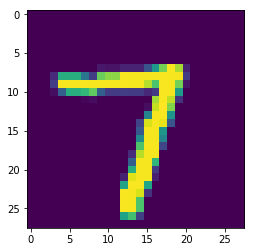

In [9]:
plt.imshow(train_images[654])

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
train_labels.shape

(60000, 10)

We are now ready to train our network, which in Keras is done via a call to the fit method of the network: we "fit" the model to its training data.

In [18]:
network.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.2529 - acc: 0.9306

Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over the training data.

We quickly reach an accuracy of 0.931 (i.e. 93.1%) on the training data. Now let's check that our model performs well on the test set too:

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 20us/step


In [17]:
print('test_acc:', test_acc)

test_acc: 0.9283


Our test set accuracy turns out to be 92.8% -- that's quite a bit lower than the training set accuracy. This gap between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data. 

## Another Model (Nonlinear!)

In [19]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [20]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [21]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.2554 - acc: 0.9254

In [22]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 91us/step

In [23]:
print('test_acc:', test_acc)

test_acc: 0.9813


# Tobys SVM testing

In [43]:
# Standard scientific Python imports
import random

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

In [41]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Take a fiffth of the data (far too much for the svm machine)
train_images=train_images[:len(train_images)//5]
train_labels=train_labels[:len(train_labels)//5]

test_images=test_images[:len(test_images)//5]
test_labels=test_labels[:len(test_labels)//5]

location 331 should be 7
location 332 should be 9
location 333 should be 4
location 334 should be 0
location 335 should be 6
location 336 should be 7
location 337 should be 2
location 338 should be 3
location 339 should be 9


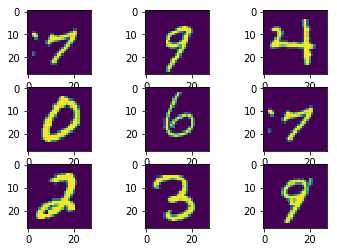

In [44]:
plt.figure(1)
for i in range(1,10):
    plt_loc = 330+i
    x = random.randrange(10,1790)
    plt.subplot(plt_loc)
    plt.imshow(train_images[x])
    print("location", plt_loc, "should be", train_labels[x])


In [45]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(train_images,train_labels))

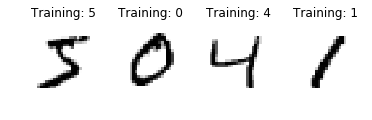

In [46]:
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [47]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(train_images)
print("we have",n_samples,"samples")

we have 12000 samples


In [48]:
data = train_images.reshape((n_samples, -1))
print("we have",len(data),"reshaped samples")

we have 12000 reshaped samples


In [49]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

In [50]:
# We learn the digits on the first half of the digits
train_data=list(zip(data,train_labels))
print(len(train_data))
train_data = train_data[:n_samples//2]
print(len(train_data))

12000
6000


In [51]:
print(train_labels.mean())
print(test_labels.mean())

4.44308333333
4.4205


Check label format before fitting data

In [56]:
classifier.fit(data[:n_samples // 2], train_labels[:n_samples // 2])

ValueError: bad input shape (6000, 10)

In [54]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [53]:
# Now predict the value of the digit on the second half:
expected = train_labels[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [47]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       614
          1       0.11      1.00      0.20       680
          2       0.00      0.00      0.00       595
          3       0.00      0.00      0.00       620
          4       0.00      0.00      0.00       561
          5       0.00      0.00      0.00       534
          6       0.00      0.00      0.00       600
          7       0.00      0.00      0.00       628
          8       0.00      0.00      0.00       576
          9       0.00      0.00      0.00       592

avg / total       0.01      0.11      0.02      6000




C:\dev\tools\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[  0, 614,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 680,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 595,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 620,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 561,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 534,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 600,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 628,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 576,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 592,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

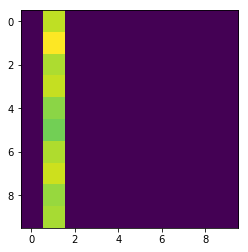

In [48]:
plt.imshow(metrics.confusion_matrix(expected, predicted))

metrics.confusion_matrix(expected, predicted)

In [32]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
